Library Importation

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Data Importation

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# because the ratio of train:test is 6:1 but we want it to be 7:3 so need to concatenate them to divide again
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [5]:
#shape after concatenate
print(X.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


Data understanding and exploration

In [6]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y[0]

5

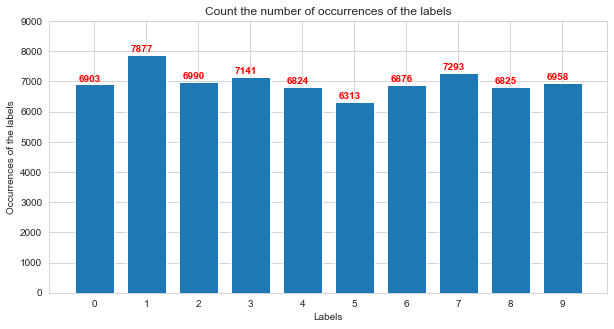

In [8]:
# show the occurrences of the labels from 0 to 9 => Data is not skewed
x_labels, y_labels = np.unique(y, return_counts=True)

width = 0.75
plt.figure(figsize=(10, 5))
plt.bar(x_labels, y_labels, width = width)
plt.xticks(x_labels)
plt.yticks(np.arange(0, 10000, 1000))
for i in range(10):
    plt.text(x_labels[i] - 0.3, y_labels[i] + 100, str(y_labels[i]), color='red', fontweight='bold')

plt.xlabel("Labels")
plt.ylabel("Occurrences of the labels")
plt.title("Count the number of occurrences of the labels")
plt.show()

Data visualization

In [16]:
def plot_input_img(n):
    fig, axs = plt.subplots(1, n, figsize=(20, 3))
    for ax, index in zip(axs, range(n)):
        ax.imshow(X[index], cmap='gray')
        ax.set_title("Label: %s" % y[index])
        ax.grid(True)

    plt.show()

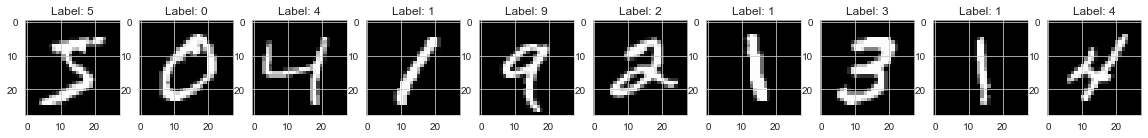

In [17]:
# show first 5 examples
plot_input_img(10)

Date Pre-processing

In [18]:
# flatten images
X_flat = X.reshape(X.shape[0], -1)
print("{} -> {}".format(X.shape, X_flat.shape))

(70000, 28, 28) -> (70000, 784)


In [19]:
# data before standardize
print(X_flat[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [20]:
# standardize the dataset: scale values of array between 0 and 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)
# data after standardize
print(X_scaled[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.09033971e-03 -5.32791506e-03 -3.77967173e-03 -3.77967173e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.77967173e-03 -5.76560474e-03 -8.56450342e-03 -1.13679013e-02
 -1.46487258e-02 -1.91989290e-02 -2.44645869e-02 -3.01635248e-02
 -3.19591431e-02 -3.22334599e-02 -3.30400834e-02 -3.08682833e-02
 -3.02683577e-02 -2.74423638e-02 -2.29285604e-02 -1.85337642e-02
 -1.61142119e-02 -1.01805633e-02 -7.70728530e-03 -4.05572859e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.77967173e-03 -4.99510937e-03
 -7.89017972e-03 -1.07311

Data Preparation

In [21]:
# divide the dataset into two parts: training set (70%) and test set (30%)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [22]:
# also divide original dataset to sync
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [23]:
# shape after dividing
print('X_train shape:',X_train_scaled.shape)
print('y_train shape:',y_train_scaled.shape)
print('X_test shape:',X_test_scaled.shape)
print('y_test shape:',y_test_scaled.shape)

X_train shape: (49000, 784)
y_train shape: (49000,)
X_test shape: (21000, 784)
y_test shape: (21000,)


Model Building

Linear model

In [24]:
# train linear model, default value of gamma, C, degree
linear_model = svm.SVC(kernel='linear')
linear_model.fit(X_train_scaled, y_train_scaled)

print(linear_model.score(X_test_scaled, y_test_scaled))

0.9219047619047619


Non-linear model

In [25]:
# using poly kernel, default value of gamma, C, degree

# train non-linear model with poly kernel
non_linear_model_poly = svm.SVC(kernel='poly')
non_linear_model_poly.fit(X_train_scaled, y_train_scaled)

print(non_linear_model_poly.score(X_test_scaled, y_test_scaled))

0.960047619047619


In [26]:
# using rbf kernel, default value of gamma, C, degree

# train non-linear model with rbf kernel
non_linear_model_rbf = svm.SVC(kernel='rbf')
non_linear_model_rbf.fit(X_train_scaled, y_train_scaled)

print(non_linear_model_rbf.score(X_test_scaled, y_test_scaled))

0.9653333333333334


In [27]:
# using rbf kernel, default value of gamma, C, degree

# train non-linear model with rbf kernel
non_linear_model_sigmoid = svm.SVC(kernel='sigmoid')
non_linear_model_sigmoid.fit(X_train_scaled, y_train_scaled)

print(non_linear_model_sigmoid.score(X_test_scaled, y_test_scaled))

0.8851428571428571


Model Evaluation

In [28]:
# predict by linear model
y_linear_pred = linear_model.predict(X_test_scaled)

# predict by non-linear model with poly kernel
y_poly_pred = non_linear_model_poly.predict(X_test_scaled)

# predict by non-linear model with rbf kernel
y_rbf_pred = non_linear_model_rbf.predict(X_test_scaled)

# predict by non-linear model with sigmoid kernel
y_sigmoid_pred = non_linear_model_sigmoid.predict(X_test_scaled)

-----Linear Model-----
Accuracy:  0.9219047619047619


<AxesSubplot:>

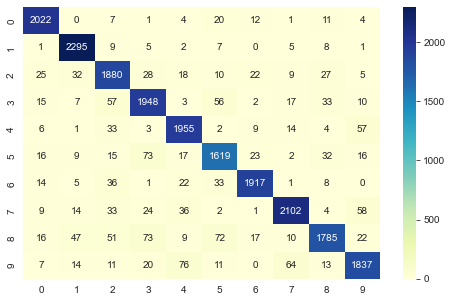

In [29]:
# accuracy and confusion matrix
print("-----Linear Model-----")
print("Accuracy: ", metrics.accuracy_score(y_true=y_test_scaled, y_pred=y_linear_pred))
conf_matrix_linear = pd.DataFrame(data = metrics.confusion_matrix(y_true=y_test_scaled, y_pred=y_linear_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap="YlGnBu")

-----Non-linear Model - poly kernel-----
Accuracy:  0.960047619047619


<AxesSubplot:>

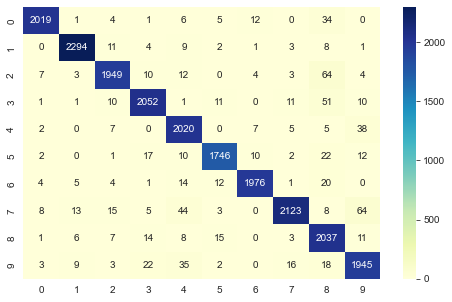

In [30]:
print("-----Non-linear Model - poly kernel-----")
print("Accuracy: ", metrics.accuracy_score(y_true=y_test_scaled, y_pred=y_poly_pred))
conf_matrix_poly = pd.DataFrame(data = metrics.confusion_matrix(y_true=y_test_scaled, y_pred=y_poly_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap="YlGnBu")

-----Non-linear Model - rbf kernel-----
Accuracy:  0.9653333333333334


<AxesSubplot:>

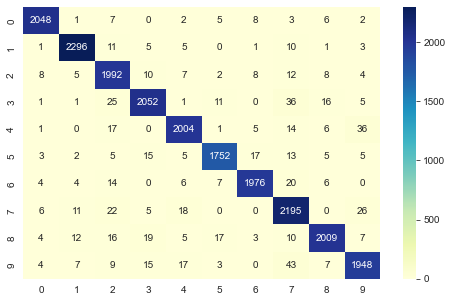

In [31]:
print("-----Non-linear Model - rbf kernel-----")
print("Accuracy: ", metrics.accuracy_score(y_true=y_test_scaled, y_pred=y_rbf_pred))
conf_matrix_rbf = pd.DataFrame(data = metrics.confusion_matrix(y_true=y_test_scaled, y_pred=y_rbf_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap="YlGnBu")

-----Non-linear Model - sigmoid kernel-----
Accuracy:  0.8851428571428571


<AxesSubplot:>

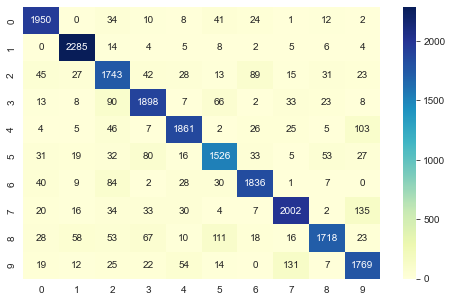

In [32]:
print("-----Non-linear Model - sigmoid kernel-----")
print("Accuracy: ", metrics.accuracy_score(y_true=y_test_scaled, y_pred=y_sigmoid_pred))
conf_matrix_sigmoid = pd.DataFrame(data = metrics.confusion_matrix(y_true=y_test_scaled, y_pred=y_sigmoid_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_sigmoid, annot=True, fmt='d', cmap="YlGnBu")

In [33]:
# precision, recall and f1-score
print("-----Linear Model-----")
linear_scores=metrics.classification_report(y_test_scaled, y_linear_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(linear_scores)

-----Linear Model-----
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2082
           1       0.95      0.98      0.96      2333
           2       0.88      0.91      0.90      2056
           3       0.90      0.91      0.90      2148
           4       0.91      0.94      0.93      2084
           5       0.88      0.89      0.89      1822
           6       0.96      0.94      0.95      2037
           7       0.94      0.92      0.93      2283
           8       0.93      0.85      0.89      2102
           9       0.91      0.89      0.90      2053

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000



In [34]:
print("-----Non-linear Model - poly kernel-----")
poly_scores=metrics.classification_report(y_test_scaled, y_poly_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(poly_scores)

-----Non-linear Model - poly kernel-----
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2082
           1       0.98      0.98      0.98      2333
           2       0.97      0.95      0.96      2056
           3       0.97      0.96      0.96      2148
           4       0.94      0.97      0.95      2084
           5       0.97      0.96      0.97      1822
           6       0.98      0.97      0.98      2037
           7       0.98      0.93      0.95      2283
           8       0.90      0.97      0.93      2102
           9       0.93      0.95      0.94      2053

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [35]:
print("-----Non-linear Model - rbf kernel-----")
rbf_scores=metrics.classification_report(y_test_scaled, y_rbf_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(rbf_scores)

-----Non-linear Model - rbf kernel-----
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2082
           1       0.98      0.98      0.98      2333
           2       0.94      0.97      0.95      2056
           3       0.97      0.96      0.96      2148
           4       0.97      0.96      0.96      2084
           5       0.97      0.96      0.97      1822
           6       0.98      0.97      0.97      2037
           7       0.93      0.96      0.95      2283
           8       0.97      0.96      0.96      2102
           9       0.96      0.95      0.95      2053

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [36]:
print("-----Non-linear Model - sigmoid kernel-----")
sigmoid_scores=metrics.classification_report(y_test_scaled, y_sigmoid_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(sigmoid_scores)

-----Non-linear Model - sigmoid kernel-----
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2082
           1       0.94      0.98      0.96      2333
           2       0.81      0.85      0.83      2056
           3       0.88      0.88      0.88      2148
           4       0.91      0.89      0.90      2084
           5       0.84      0.84      0.84      1822
           6       0.90      0.90      0.90      2037
           7       0.90      0.88      0.89      2283
           8       0.92      0.82      0.87      2102
           9       0.84      0.86      0.85      2053

    accuracy                           0.89     21000
   macro avg       0.88      0.88      0.88     21000
weighted avg       0.89      0.89      0.88     21000



Model Optimization

In [69]:
seed = 7
num_folds = 10
scoring = 'accuracy'
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = svm.SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train_scaled)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

PCA

In [37]:
# keep the data dimensionality unchanged
pca_all= PCA()
X_pca_all = pca_all.fit_transform(X_scaled)

print("The percentage of variance explained by " + str(pca_all.n_components_) +  " principal components ", sum(pca_all.explained_variance_ratio_ * 100))

The percentage of variance explained by 784 principal components  99.99999999999997


In [38]:
pca_all.explained_variance_ratio_ * 100

array([5.64271890e+00, 4.04122588e+00, 3.73827333e+00, 2.89299967e+00,
       2.52075176e+00, 2.19254904e+00, 1.91428200e+00, 1.74068380e+00,
       1.53223192e+00, 1.39608655e+00, 1.34217502e+00, 1.20142136e+00,
       1.11396188e+00, 1.09058166e+00, 1.02798565e+00, 9.94954818e-01,
       9.31255447e-01, 9.19634749e-01, 8.88599812e-01, 8.63195357e-01,
       8.21741429e-01, 7.98416580e-01, 7.62572887e-01, 7.42315294e-01,
       7.16569784e-01, 6.89313988e-01, 6.81399054e-01, 6.54587652e-01,
       6.27293368e-01, 6.10345345e-01, 5.97260805e-01, 5.89303875e-01,
       5.67358491e-01, 5.59357597e-01, 5.52473105e-01, 5.34443453e-01,
       5.27593434e-01, 5.15841172e-01, 5.05498061e-01, 4.77437784e-01,
       4.76312011e-01, 4.65154837e-01, 4.53454310e-01, 4.45757102e-01,
       4.42312508e-01, 4.37877290e-01, 4.37293648e-01, 4.27723692e-01,
       4.24807888e-01, 4.18523984e-01, 4.04059497e-01, 3.96258302e-01,
       3.93175520e-01, 3.90561562e-01, 3.86443636e-01, 3.77500874e-01,
      

In [39]:
np.cumsum(pca_all.explained_variance_ratio_ * 100)

array([  5.6427189 ,   9.68394478,  13.42221811,  16.31521778,
        18.83596954,  21.02851857,  22.94280058,  24.68348438,
        26.2157163 ,  27.61180285,  28.95397788,  30.15539924,
        31.26936111,  32.35994278,  33.38792843,  34.38288324,
        35.31413869,  36.23377344,  37.12237325,  37.98556861,
        38.80731004,  39.60572662,  40.3682995 ,  41.1106148 ,
        41.82718458,  42.51649857,  43.19789763,  43.85248528,
        44.47977865,  45.09012399,  45.6873848 ,  46.27668867,
        46.84404716,  47.40340476,  47.95587786,  48.49032132,
        49.01791475,  49.53375592,  50.03925398,  50.51669177,
        50.99300378,  51.45815862,  51.91161293,  52.35737003,
        52.79968254,  53.23755983,  53.67485347,  54.10257717,
        54.52738505,  54.94590904,  55.34996853,  55.74622684,
        56.13940236,  56.52996392,  56.91640755,  57.29390843,
        57.6677912 ,  58.03611966,  58.39649654,  58.75286607,
        59.10215464,  59.44668204,  59.78992084,  60.13

Text(0.5, 0.85, '95% cut-off threshold')

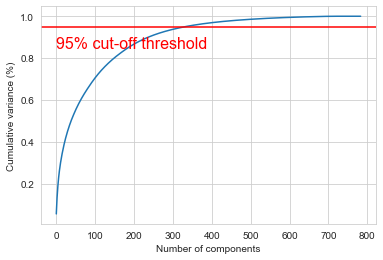

In [40]:
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

In [41]:
pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("The percentage of variance explained by " + str(pca_95.n_components_) +  " principal components ", sum(pca_95.explained_variance_ratio_ * 100))

The percentage of variance explained by 332 principal components  95.00311796713798


In [42]:
# n_components=2
pca_2 = PCA(n_components=2, random_state=2022)
X_pca_2= pca_2.fit_transform(X_scaled)

print("The percentage of variance explained by " + str(pca_2.n_components_) +  " principal components ", sum(pca_2.explained_variance_ratio_ * 100))

The percentage of variance explained by 2 principal components  9.683944743860149


In [43]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, y, test_size=0.3, random_state=30)

In [44]:
# train non-linear model with rbf kernel
pca_rbf_model = svm.SVC(kernel='rbf')
pca_rbf_model.fit(X_train_pca, y_train_pca)

print(pca_rbf_model.score(X_test_pca, y_test_pca))

0.9664761904761905


In [45]:
# predict by non-linear model with rbf kernel
y_pred_pca = pca_rbf_model.predict(X_test_pca)

-----Non-linear Model - rbf kernel-----
Accuracy:  0.9664761904761905


<AxesSubplot:>

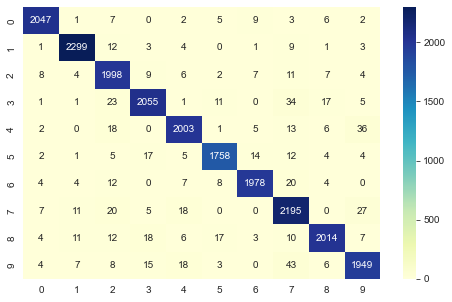

In [46]:
print("-----Non-linear Model - rbf kernel-----")
print("Accuracy: ", metrics.accuracy_score(y_true=y_test_pca, y_pred=y_pred_pca))
conf_matrix_pca = pd.DataFrame(data = metrics.confusion_matrix(y_true=y_test_pca, y_pred=y_pred_pca))
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap="YlGnBu")

In [47]:
print("-----Non-linear Model - rbf kernel-----")
pca_scores=metrics.classification_report(y_test_pca, y_pred_pca, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(pca_scores)

-----Non-linear Model - rbf kernel-----
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2082
           1       0.98      0.99      0.98      2333
           2       0.94      0.97      0.96      2056
           3       0.97      0.96      0.96      2148
           4       0.97      0.96      0.96      2084
           5       0.97      0.96      0.97      1822
           6       0.98      0.97      0.98      2037
           7       0.93      0.96      0.95      2283
           8       0.98      0.96      0.97      2102
           9       0.96      0.95      0.95      2053

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [65]:
def plot_output_pca_img(n):
    fig, axs = plt.subplots(1, n, figsize=(30, 6))
    for ax, index in zip(axs, range(n)):
        ax.imshow(X_test[index], cmap='gray')
        ax.set_title("Label: {} | Predict: {}".format(y_test[index], y_pred_pca[index]))
        ax.grid(True)
    plt.show()

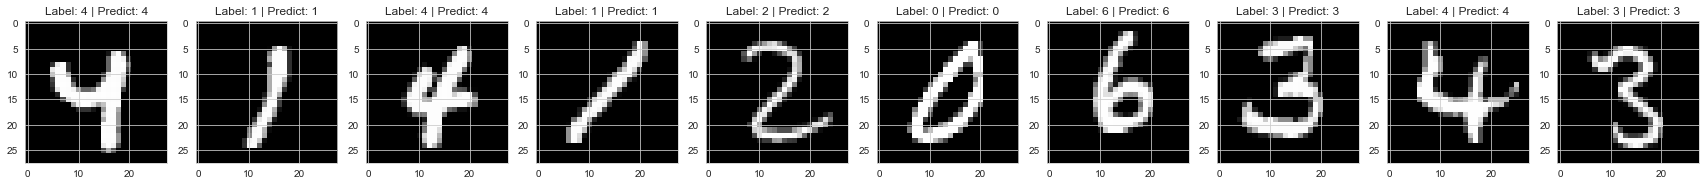

In [66]:
plot_output_pca_img(10)

In [62]:
def plot_output_img(n):
    fig, axs = plt.subplots(1, n, figsize=(30, 6))
    for ax, index in zip(axs, range(n)):
        ax.imshow(X_test[index], cmap='gray')
        ax.set_title("Label: {} | Predict: {}".format(y_test[index], y_rbf_pred[index]))
        ax.grid(True)
    plt.show()

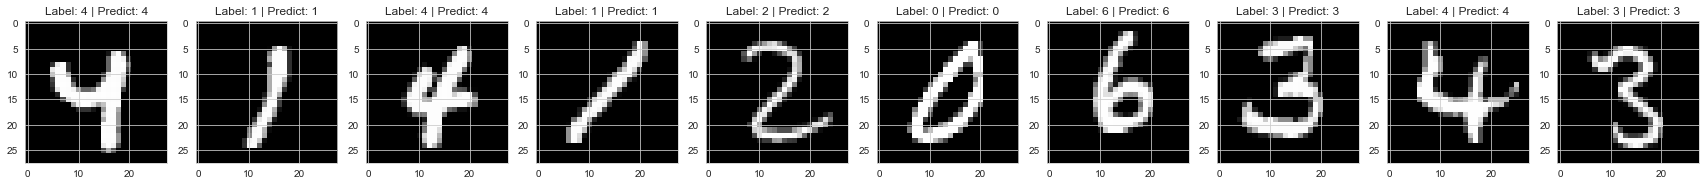

In [64]:
plot_output_img(10)